# Week3 授業前課題2 住宅情報の分析  
エイムズ市の住宅価格

アイオワ州エイムズ市の住宅価格データセットを使い、基本的なデータの扱い方を学んでいきます。

住宅に関する79種類もの説明変数が用意されているため、それらと価格との関係を探索していきましょう。
エイムズがどのような街なのかもWikipediaなどで確認しておくと良いでしょう。

### KaggleのNotebooks  

Kaggleでは「Notebooks」としていろいろな人がデータ探索（EDA）を行ったコードが共有されています。良いEDAをたくさん見て、ノウハウを吸収していきましょう。今回の課題をやる上でも参考にしたり、課題になっていないことに挑戦したりしてください。

これ以降Kaggleを利用していきますので、アカウントを作成してください。

## 【問題1】データセットの取得  

>pd.read_csv()を使用して、変数に格納してください。



In [1]:
import pandas as pd

csv_path = "./Kaggle_data/train.csv" # ファイル名（パス）を指定する
df = pd.read_csv(csv_path)

print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

## 【問題2】データセット自体の調査  
>KaggleのOverviewページや、Dataページの「Data fields」などを読みながら、どのようなデータセットかを説明してください。

アイオワ州エイムズの住宅について７９種類のデータを集めたデータセットである。
このデータセットには、このコンペにおいて予測することが求められるターゲット変数である「SalePrice-プロパティのドルでの販売価格」をはじめ、「MSSubClass：建物クラス」、「MSZoning：一般的なゾーニング分類」、「LotFrontage：プロパティに接続された通りの直線フィート」など、住宅価格と関連すると思われる項目が多数含まれている。

## 【問題3】データの確認  

>データを確認していきます。コードとマークダウンを組み合わせてレポートしてください。
>
>- 各特徴量がどういったものかを見る。（数値データか文字データなど）
>- 今回の目的変数はどの列か確認する。
>- 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

### １. 各特徴量がどういったものかを見る。（数値データか文字データなど）

pandasの.infoメソッドを実行すると各特徴量の詳細を見ることができる。  
Dtype欄を見ると各特徴量の型を見ることができ、このデータセットには  
「int64」型、「float64」型、「object」型の３種類あることが確認できる。  
「int64」および「float64」は数値データであり、「object」は文字データである。  
また、Non-Null Count欄を見ると各特徴量にどれだけの数のデータがあるかを  
確認でき、RangeIndex が1460 であるため、1460 より少ない特徴量は  
データ欠損があると疑われる。 

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 2. 今回の目的変数はどの列か確認する。 
最終列（80列目）の「SalePrice」が目的関数。  
Overview内のEvaluationのGoalに「SalePrice変数」を予測する必要があるとの記載あり。


In [3]:
print("SalePriceは {} 行目。".format(df.columns.get_loc('SalePrice')))
print(df['SalePrice'])

SalePriceは 80 行目。
0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


### 3. 特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [4]:
print("House Prices データセットの特徴量の平均値、標準偏差、四分位数:\n{}"
     .format(df.iloc[:,1:].describe()))

House Prices データセットの特徴量の平均値、標準偏差、四分位数:
        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   1

## 【問題4】欠損値への対応  

>欠損値に関して以下のことを行い、レポートしてください。
>
>- 各特徴量の欠損値の有無を確認する。
>
>欠損値の確認にはmissingnoというライブラリを活用しましょう。このライブラリにより欠損値の有無が可視化できます。インストールや使い方に関しては以下のページをご覧ください。
>
>ResidentMario/missingno: Missing data visualization module for Python.
>
>- 欠損値が何パーセント含まれるかを確認する。
>- 5つ以上欠損値がある特徴量（列）は削除する。
>- 欠損値があるサンプル（行）は削除する。

### 1. 各特徴量の欠損値の有無を確認する。

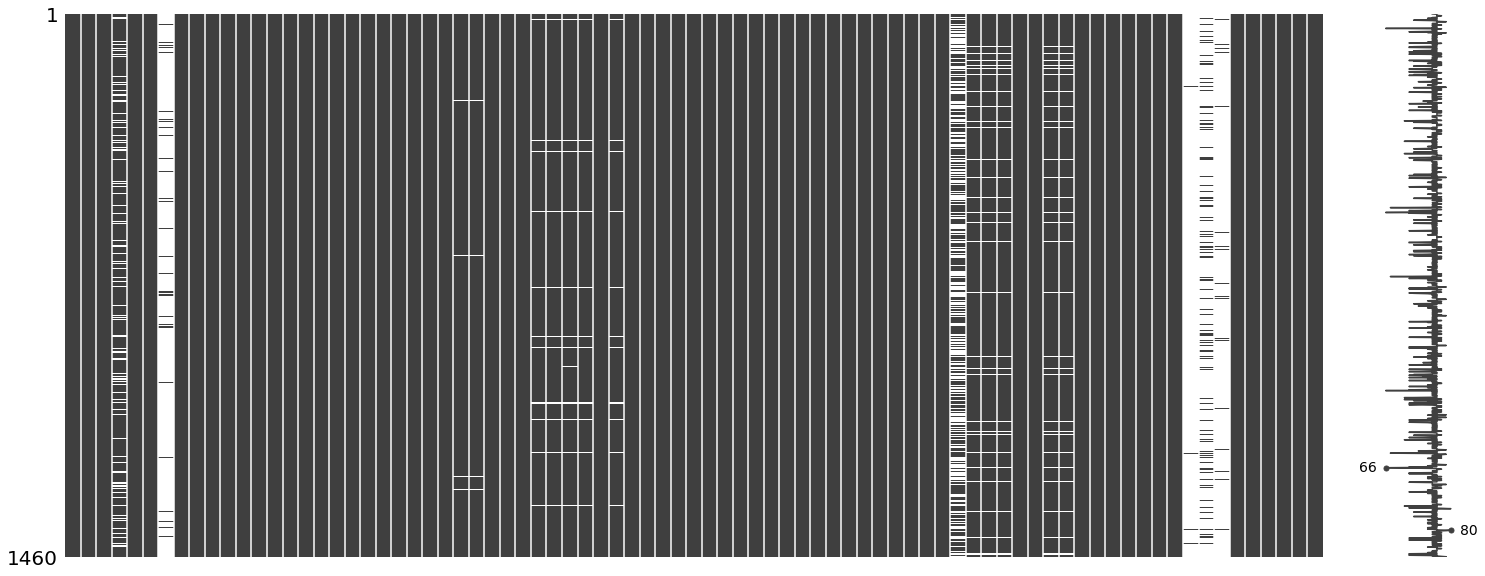

In [5]:
import numpy as np
# 欠損地確認のためmissingnoライブラリを読み込む
import missingno as msno

# 参照渡しにならないよう.copy()を使用
df_mi = df.copy()
df_mi = df_mi.replace("nan", np.nan)

# Matrix を描画
msno.matrix(df_mi)

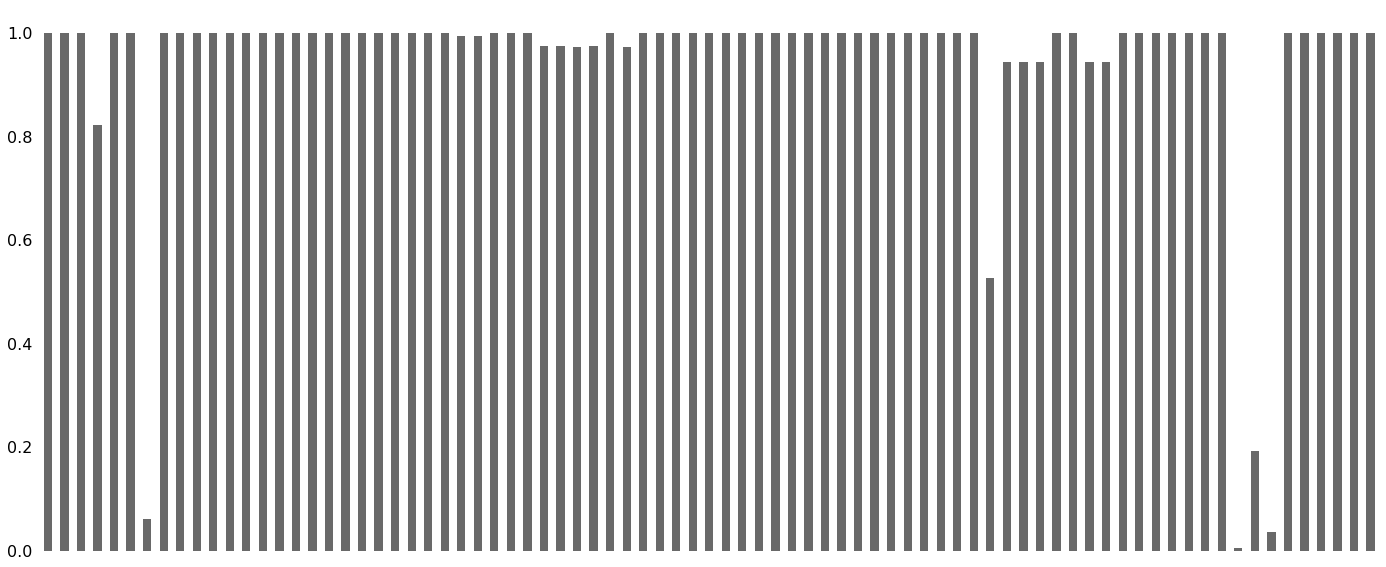

In [6]:
# Bar Chart を描画
msno.bar(df_mi)

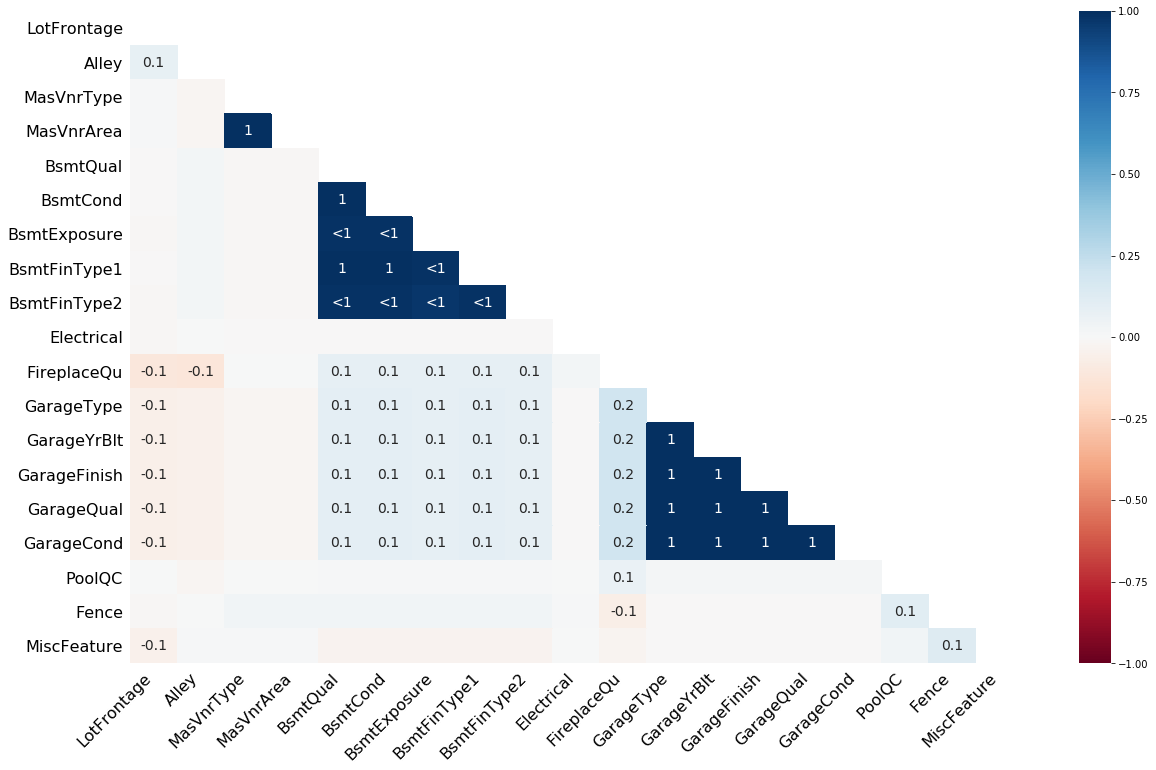

In [7]:
# Heatmap を描画
msno.heatmap(df_mi)

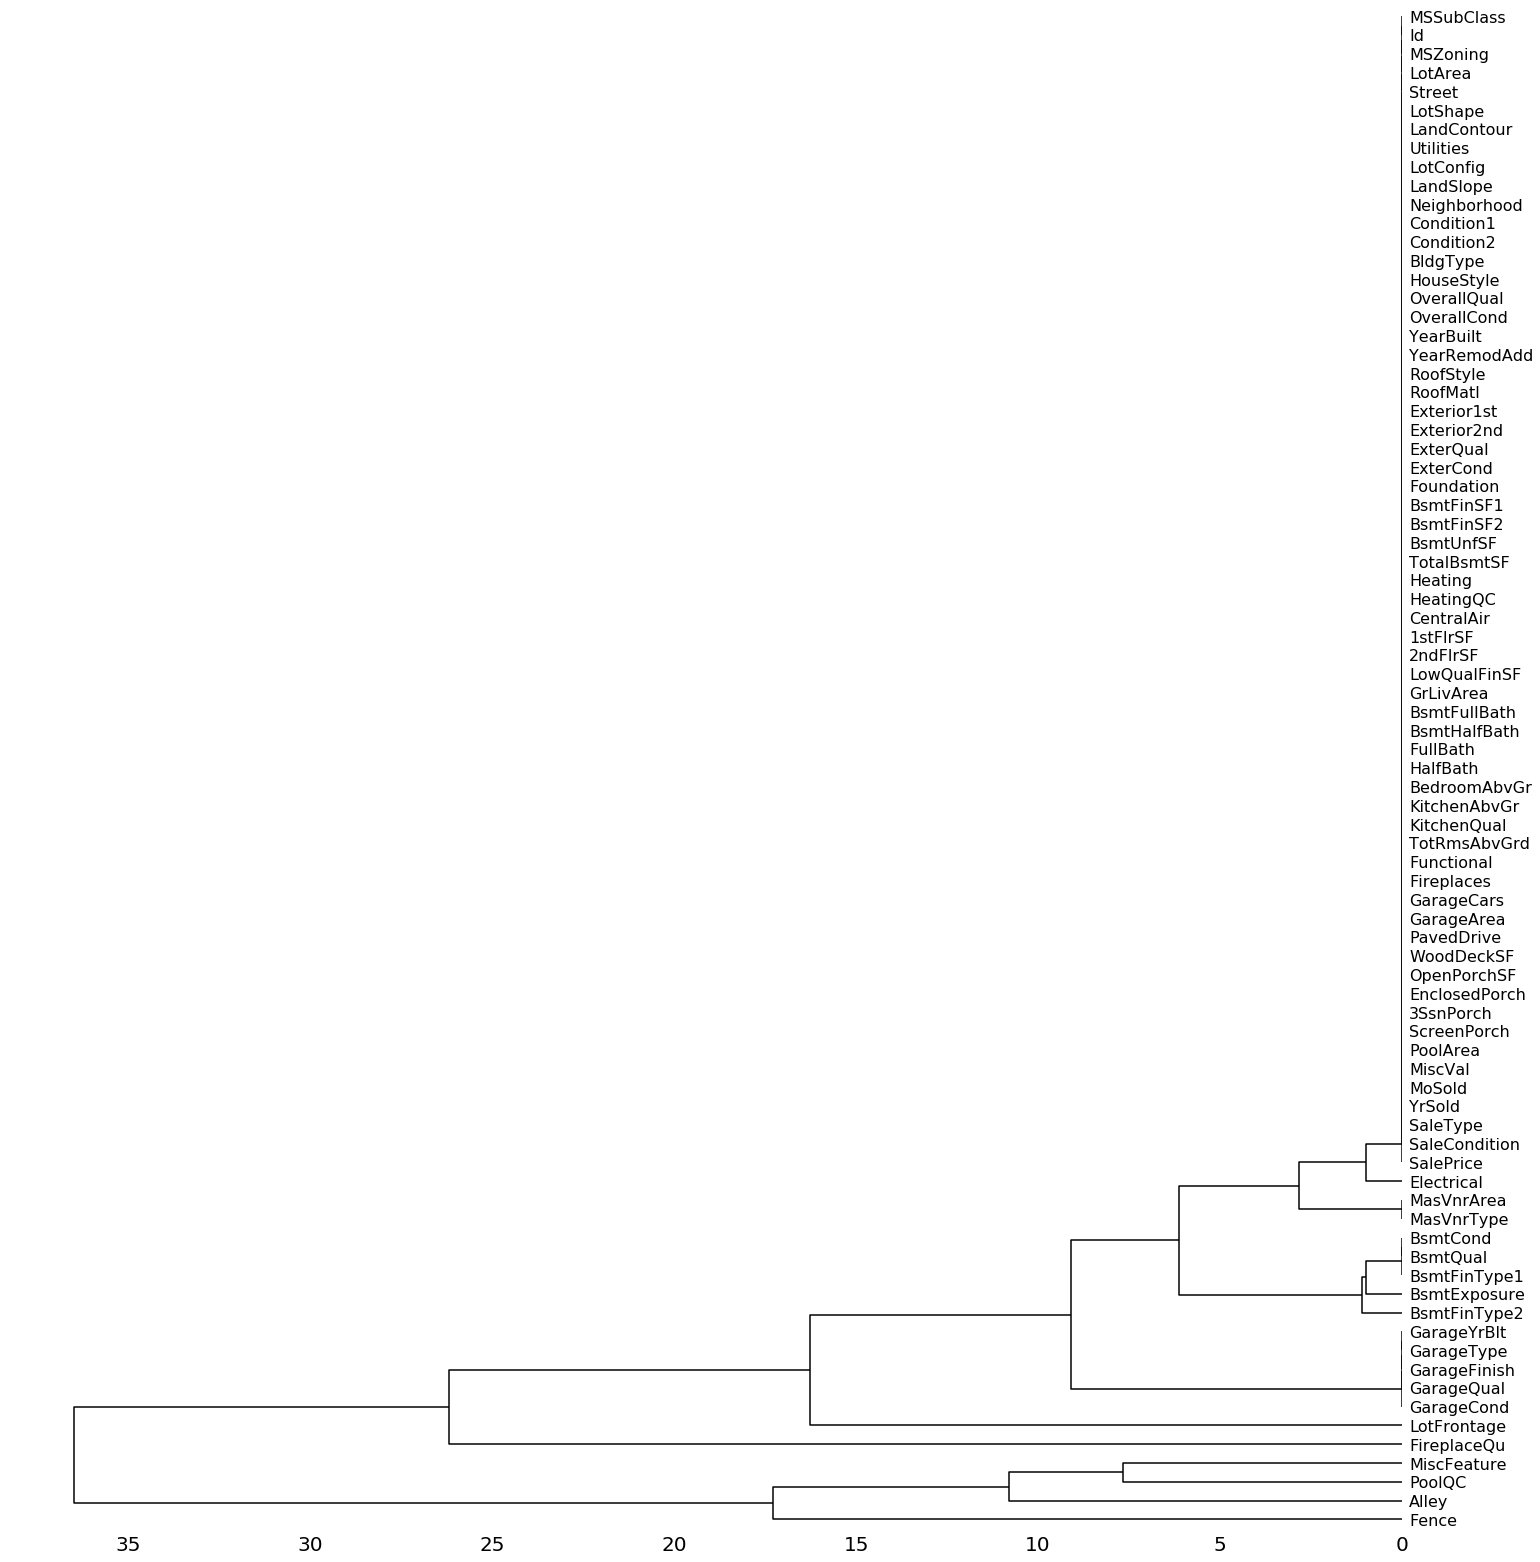

In [8]:
# Dendrogramを描画

msno.dendrogram(df_mi)

### 2. 欠損値が何パーセント含まれるかを確認する。

In [9]:
# 計算結果を入れるための配列を用意
missing_ratio_list = []

for f in range(1, len(df.columns)):
    # 各特徴量の名称、欠損数、欠損率を入れるリスト
    features_data = []
    # 特徴量名を取得
    features_data.append(df.columns[f])
    # 欠損数を取得
    missing_count = df.iloc[:,f].isnull().sum()
    features_data.append(missing_count)
    # 欠損率を取得
    total = len(df.iloc[:,f])
    features_data.append(missing_count/total)
    # 結果用の配列にリストを格納
    missing_ratio_list.append(features_data)

# 計算結果をpandasのデータフレームに変換
ratio_df = pd.DataFrame(missing_ratio_list)
ratio_df.columns = ['','Total', 'missing_ratio']

# 最大表示行数を80に設定してすべてを表示
pd.set_option('display.max_rows', 80)
# 表で出力。降順で並べ替え。
display(ratio_df.sort_values('Total', ascending=False))


,,Total,missing_ratio
71,PoolQC,1453,0.995205
73,MiscFeature,1406,0.963014
5,Alley,1369,0.937671
72,Fence,1179,0.807534
56,FireplaceQu,690,0.472603
2,LotFrontage,259,0.177397
58,GarageYrBlt,81,0.055479
63,GarageCond,81,0.055479
57,GarageType,81,0.055479
59,GarageFinish,81,0.055479


### 3. 5つ以上欠損値がある特徴量（列）は削除する。

In [10]:
# 削除した列名を保管するリスト（確認用）
drop_c_list=[]
# 削除前の列数を削保管するリスト（確認用）
start_column = len(df.columns)

# 削除しても列がずれないように逆からループ
for i in reversed(range(len(df.columns))):
    if df.iloc[:,i].isnull().sum()>=5:
        column_name = df.columns[i]
        df = df.drop(column_name, axis=1)
        drop_c_list.append(column_name)

# 削除後の列数を削保管するリスト（確認用）
end_column = len(df.columns)

print("削除前に{}列ありましたが、５つ以上欠損値がある{}個の項目を削除し、現在{}列です。"\
      .format(start_column, start_column-end_column, end_column))
print("削除した項目は以下の通り:\n{}".format(drop_c_list))


削除前に81列ありましたが、５つ以上欠損値がある18個の項目を削除し、現在63列です。
削除した項目は以下の通り:
['MiscFeature', 'Fence', 'PoolQC', 'GarageCond', 'GarageQual', 'GarageFinish', 'GarageYrBlt', 'GarageType', 'FireplaceQu', 'BsmtFinType2', 'BsmtFinType1', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 'MasVnrType', 'Alley', 'LotFrontage']


### 4. 欠損値があるサンプル（行）は削除する。

In [11]:
# 削除した行を保管するリスト（確認用）
drop_r_list=[]
# 削除前の行数を削保管するリスト（確認用）
start_row = len(df.index)

# 削除しても行がずれないように逆からループ
for i in reversed(range(len(df.index))):
    if df.loc[i].isnull().sum()>0:
        df = df.drop(i, axis=0)
        drop_r_list.append(i)

# 削除後の行数を削保管するリスト（確認用）
end_row = len(df.index)

print("削除前に{}列ありましたが、欠損値がある{}個の項目を削除し、現在{}列です。"\
      .format(start_row, start_row-end_row, end_row))
print("削除した項目は以下の通り:\n{}".format(drop_r_list))


1379
削除前に1460列ありましたが、欠損値がある1個の項目を削除し、現在1459列です。
削除した項目は以下の通り:
[1379]


## 【問題5】用語の調査  
>以下の２つの単語を知る必要があります。これらを調査してまとめてください。
>
>- 尖度
>- 歪度  

- 尖度（せんど、英: kurtosis）  
分布が正規分布からどれだけ尖っているかを表す統計量で、山の尖り度と裾の広がり度を示す。正規分布より尖った分布（データが平均付近に集中し、分布の裾が重い）のときには正の値を、正規分布より扁平な分布（データが平均付近から散らばり、分布の裾が軽い）のときには負の値をとる。正規分布の場合には0になる。pandasの.kurt()メソッドで計算できる。  

- 歪度（わいど、英: skewness）  
分布が正規分布からどれだけ歪んでいるかを表す統計量で、左右対称性を示す指標のこと。「右裾が長い」もしくは「右に歪んだ」もしくは「左に偏った」分布のときには正の値を、「左裾が長い」もしくは「左に歪んだ」もしくは「右に偏った」分布のときには負の値をとる。左右対称の分布（例えば正規分布）の場合には0になる。pandasの.skew()で計算できる。  

## 【問題6】分布の確認  
>- seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。
>- 目的変数に対して対数変換を行う。
>- 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。
>
>対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。

### 1. seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。

SalePrice変数の尖度は: 6.529263049673958
SalePrice変数の歪度は: 1.8819429948035529


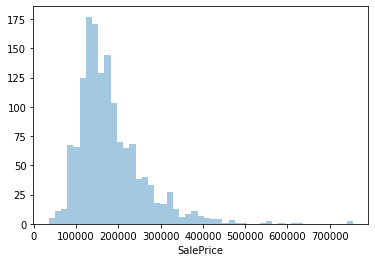

In [12]:
import seaborn as sns

# seabornで目的変数（SalePrice）のヒストグラムを表示
sns.distplot(df['SalePrice'], kde=False) 

# SalePrice の 尖度を計算
kurtosis = df['SalePrice'].kurt()
# SalePrice の 歪度を計算
skewness = df['SalePrice'].skew()

print("SalePrice変数の尖度は: {}".format(kurtosis))
print("SalePrice変数の歪度は: {}".format(skewness))


### 2. 目的変数に対して対数変換を行う。

In [13]:
import numpy as np

# numpy の自然対数をapplyにて各列に適用
SalePrice_log = df['SalePrice'].apply(np.log)

print(SalePrice_log)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1459, dtype: float64


### 3. 対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

対数変換後のSalePrice変数の尖度は: 0.806927847502148
対数変換後のSalePrice変数の歪度は: 0.12131775882415026


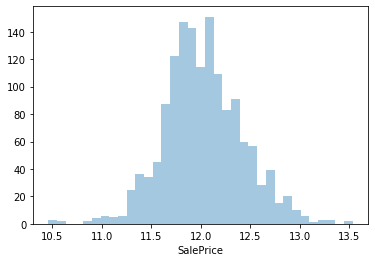

In [14]:
# seabornで対数変換後の目的変数（SalePrice）のヒストグラムを表示
sns.distplot(SalePrice_log, kde=False) 

# SalePrice の 尖度を計算
kurtosis_log = SalePrice_log.kurt()
# SalePrice の 歪度を計算
skewness_log = SalePrice_log.skew()

print("対数変換後のSalePrice変数の尖度は: {}".format(kurtosis_log))
print("対数変換後のSalePrice変数の歪度は: {}".format(skewness_log))

#### 対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。
対数変換を実施する前は尖度、歪度共に大きく、ヒストグラムを見ると左に偏っており扱いにくい印象であるが、対数変換を実施したことで尖度、歪度共に大幅に減少し、正規分布に近づいたため、統計的に扱いやすくなった。




## 【問題7】相関係数の確認  

>特徴量の確認をしていきます。それぞれに対してマークダウンで説明や考察を書いてください。
>
>- 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。
>- 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。
>- 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。
>- 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。
>
>《補足》
>
>重回帰分析などで予測する場合、相関が高すぎる特徴量の組み合わせがあると予測に悪影響が出ることがあります。このような場合の簡単な対処方法として、そういった特徴量の組みを探し出して、１つに絞るということがあります。

### 1. 相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。

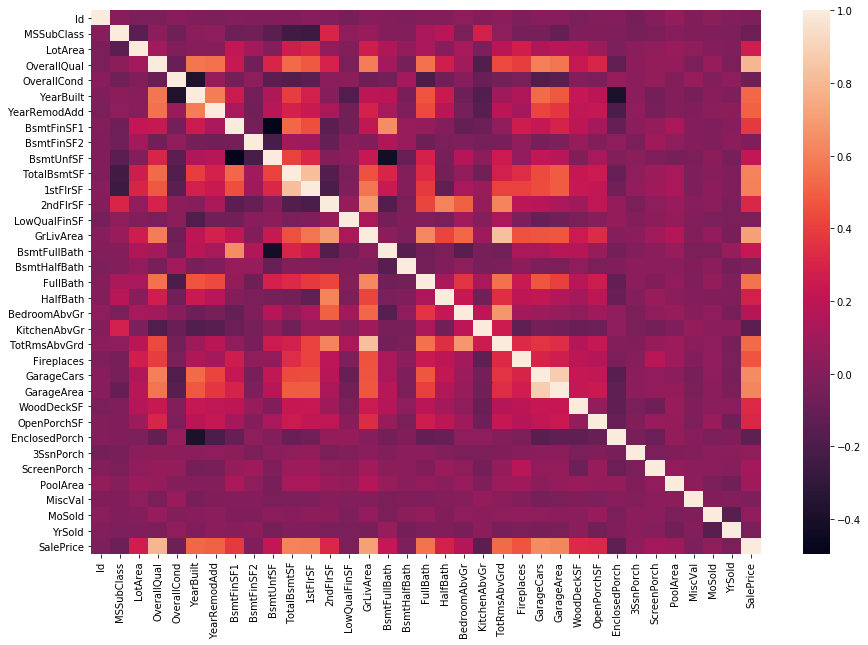

In [15]:
import matplotlib.pyplot as plt

# .corrメソッドを利用して各特徴量間の相関係数行列を作成
df_correlation_matrix = df.corr()

# seabornを使用してヒートマップを作成
plt.figure(figsize=(15, 10))
sns.heatmap(df_correlation_matrix)


以下の３つの組み合わせは相関性が高い。  
- GrLivAreaとTotRmsAbvGrd  
- GarageCarsとGarageArea  
- TotalBsmtSFと1stFlrSF


### 2. 目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。  

以下の１０個の特徴量は目的変数と相関性が高い。  
OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF,  
GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea

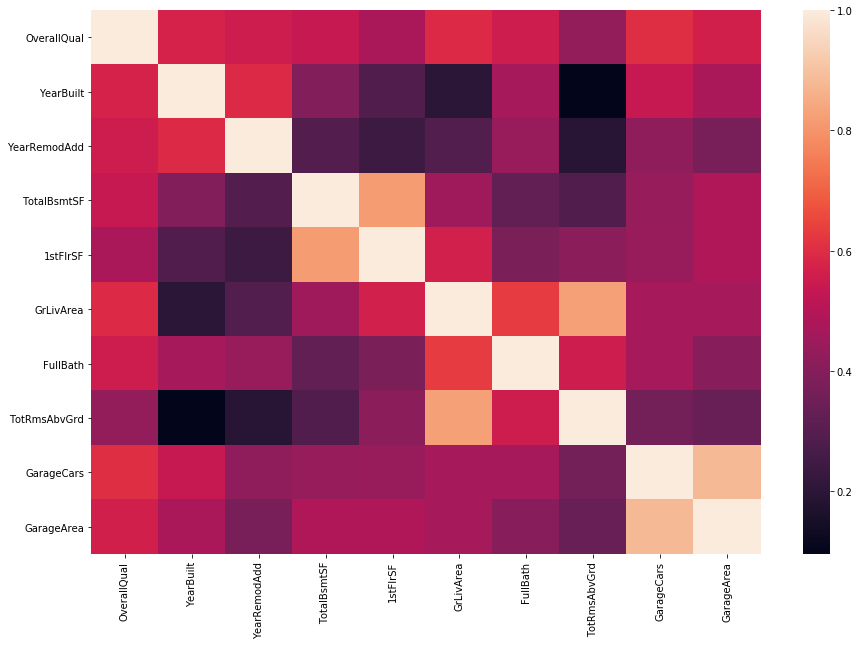

In [16]:
# 目的変数と相関が高い10個の特徴量のインデックスをリストに入れる
close_relationship = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 
             'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']

# .corrメソッドを利用して各特徴量間の相関係数行列を作成
df_correlation_matrix_close_relationship = df[close_relationship].corr()

# seabornを使用してヒートマップを作成
plt.figure(figsize=(15, 10))
sns.heatmap(df_correlation_matrix_close_relationship)

### 3. 選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。

SalePriceと相関関係が高い特徴量は以下の通り。　　
- OverallQual：総合素材と仕上がりの品質  
- YearBuilt：元の建設日  
- YearRemodAdd：改造日  
- TotalBsmtSF：地下室の総平方フィート  
- 1stFlrSF：1階平方フィート  
- GrLivArea：地上のリビングエリアの平方フィート  
- FullBath：グレード以上のフルバスルーム  
- TotRmsAbvGrd：グレード以上の部屋の合計（バスルームは含まれません）  
- GarageCars：車の容量でのガレージのサイズ  
- GarageArea：ガレージのサイズ（平方フィート）  

上記の特徴量のグレードが上がるほど家の価格は高くなり、グレードが下がるほど価格は安くなる。  
特に、広さ（リビング、地下室、ガレージ）や耐久性（築年数や素材）に関する項目の相関性が高い。


### 4. 選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。  
以下の３つの組み合わせは相関性が高い。  
- GrLivAreaとTotRmsAbvGrd  
- GarageCarsとGarageArea  
- TotalBsmtSFと1stFlrSF